In [1]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras-preprocessing

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install streamlit 

In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import re
import torch
import string
import warnings
import pickle
import joblib
from transformers import AutoModel, AutoTokenizer, RobertaForSequenceClassification
from unidecode import unidecode
warnings.filterwarnings('ignore')
# Sklearn and text processing imports
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC  # SVM
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.linear_model import LogisticRegression  # Logistic Regression
# TensorFlow and Keras imports (updated)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout #LSTM
from tensorflow.keras.utils import to_categorical
# Gensim and other machine learning libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score ,classification_report
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
# Visualization libraries
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Đọc dữ liệu

In [6]:
df1=pd.read_excel('C:\\Users\\Admin\\OneDrive - ueh.edu.vn\\Documents\\Python\\nlp\\comt.xlsx')
df1

,Unnamed: 0,content
0,245398,nam chính có đóng phim quỹ trung mỹ nhân đó đa...
1,749681,Phim tựa tựa như phim Hãy nhắm mắt khi anh đến
2,406013,trời ơi...đã đợi dài cổ r. lại còn cho 2 cái t...
3,575684,tang tang nhìn lúc bê bát mì với cầm cái ô thư...
4,764558,Chỉ tiếc c ấy ko biết đánh bóng bàn nên ko đc ...
...,...,...
9995,518357,"Phim càng ngày càng tao lao,lâm đông chẳng tiế..."
9996,642196,182 film này đâu có châu hải my đó là mã nhã t...
9997,609016,Xem RM bây giờ cũng vì SC và 6 tv còn lại. Giờ...
9998,451687,đag trong chờ k biết khi nào tần vương mới thấ...


In [7]:
df1 =df1[['content']]
df1

,content
0,nam chính có đóng phim quỹ trung mỹ nhân đó đa...
1,Phim tựa tựa như phim Hãy nhắm mắt khi anh đến
2,trời ơi...đã đợi dài cổ r. lại còn cho 2 cái t...
3,tang tang nhìn lúc bê bát mì với cầm cái ô thư...
4,Chỉ tiếc c ấy ko biết đánh bóng bàn nên ko đc ...
...,...
9995,"Phim càng ngày càng tao lao,lâm đông chẳng tiế..."
9996,182 film này đâu có châu hải my đó là mã nhã t...
9997,Xem RM bây giờ cũng vì SC và 6 tv còn lại. Giờ...
9998,đag trong chờ k biết khi nào tần vương mới thấ...


In [8]:
df1.shape

(10000, 1)

## Tiền xử lý dữ liệu

In [9]:
# Loại bỏ dấu câu không cần thiết
df1['content'] = df1['content'].str.replace(r'[\?.!]', '', regex=True)
# Chuyển về chữ thường
df1['content'] = df1['content'].str.lower()
# Loại bỏ icon/emojis (biểu tượng cảm xúc)
emoji_pattern = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # cảm xúc mặt cười
    u"\U0001F300-\U0001F5FF"  # ký hiệu và biểu tượng
    u"\U0001F680-\U0001F6FF"  # phương tiện vận chuyển và biểu tượng
    u"\U0001F1E0-\U0001F1FF"  # cờ quốc gia
    u"\u2600-\u26FF"          # ký hiệu thêm
    u"\u2700-\u27BF"          # ký tự thư từ
    "]+",
    flags=re.UNICODE,
)
df1['content'] = df1['content'].str.replace(emoji_pattern, '', regex=True)
# Chuẩn hóa từ viết tắt
df1['content'] = df1['content'].str.replace(r'\b(?:t|tao)\b', 'tôi', regex=True)
df1['content'] = df1['content'].str.replace(r'\b(?:hông|hong|ko|k)\b', 'không', regex=True)
df1['content'] = df1['content'].str.replace(r'\bak\b', 'à', regex=True)
df1['content'] = df1['content'].str.replace(r'\bvx\b', 'vẫn', regex=True)
df1['content'] = df1['content'].str.replace(r'\btr\b', 'trời', regex=True)
df1['content'] = df1['content'].str.replace(r'\bj\b', 'gì', regex=True)
df1['content'] = df1['content'].str.replace(r'\bh\b', 'giờ', regex=True)
df1['content'] = df1['content'].str.replace(r'\br\b', 'rồi', regex=True)
df1['content'] = df1['content'].str.replace(r'\btv\b', 'tivi', regex=True)
df1['content'] = df1['content'].str.replace(r'\bmn\b', 'mọi người', regex=True)
df1['content'] = df1['content'].str.replace(r'\blun\b', 'luôn', regex=True)
df1['content'] = df1['content'].str.replace(r'\bfim\b|\bfilm\b', 'phim', regex=True)
df1['content'] = df1['content'].str.replace(r'\b(?:v|z)\b', 'vậy', regex=True)
df1['content'] = df1['content'].str.replace(r'\bDV\b', 'diễn viên', regex=True)
df1['content'] = df1['content'].str.replace(r'\bhóg\b', 'hóng', regex=True)
df1['content'] = df1['content'].str.replace(r'\bhey\b', 'hay', regex=True)
df1['content'] = df1['content'].str.replace(r'\bwá\b', 'quá', regex=True)
# Loại bỏ ký tự đặc biệt (biểu tượng cảm xúc khác nếu còn sót lại)
df1['content'] = df1['content'].str.replace(r'[^\w\s]', '', regex=True)
# Loại bỏ khoảng trắng thừa
df1['content'] = df1['content'].str.strip()
df1['content'] = df1['content'].str.replace(r'\s+', ' ', regex=True)
# Loại bỏ các cụm từ "cảm xúc" (vd: ":v", ":3", ":-)")
df1['content'] = df1['content'].str.replace(r':v|:3|:-\)|:-\(|:\)|:\(', '', regex=True)


In [10]:
df1

,content
0,nam chính có đóng phim quỹ trung mỹ nhân đó đa...
1,phim tựa tựa như phim hãy nhắm mắt khi anh đến
2,trời ơiđã đợi dài cổ rồi lại còn cho 2 cái tra...
3,tang tang nhìn lúc bê bát mì với cầm cái ô thư...
4,chỉ tiếc c ấy không biết đánh bóng bàn nên khô...
...,...
9995,phim càng ngày càng tôi laolâm đông chẳng tiến...
9996,182 phim này đâu có châu hải my đó là mã nhã t...
9997,xem rm bây giờ cũng vì sc và 6 tivi còn lại gi...
9998,đag trong chờ không biết khi nào tần vương mới...


## Sử dụng PhoBERT để gán nhãn tự động

In [11]:
# load pre trained model
model = RobertaForSequenceClassification.from_pretrained("wonrax/phobert-base-vietnamese-sentiment")

# load Tokenizer từ model (dùng để tách từ trong câu)
tokenizer = AutoTokenizer.from_pretrained("wonrax/phobert-base-vietnamese-sentiment", use_fast=False)


In [12]:
# Duyệt qua từng comment
def sentiment(sentence):
  try:
    input_ids = torch.tensor([tokenizer.encode(sentence)])
  except:
    return 2

  if input_ids.shape[1] > tokenizer.model_max_length:
    return 2

  with torch.no_grad():
      out = model(input_ids)
      return np.argmax(out.logits.softmax(dim=-1).tolist()[0])


In [13]:
import time
start_time = time.time()
# apply tất cả comment
df1['sentiment'] = df1['content'].apply(sentiment)
print("--- %s seconds ---" % (time.time() - start_time))

Token indices sequence length is longer than the specified maximum sequence length for this model (478 > 256). Running this sequence through the model will result in indexing errors


--- 604.8909611701965 seconds ---


In [14]:
# Lọc dữ liệu với các dòng mà sentiment có giá trị là 0 hoặc 1
df1 = df1[df1['sentiment'].isin([0, 1])]
df1


,content,sentiment
0,nam chính có đóng phim quỹ trung mỹ nhân đó đa...,0
1,phim tựa tựa như phim hãy nhắm mắt khi anh đến,1
2,trời ơiđã đợi dài cổ rồi lại còn cho 2 cái tra...,0
5,trời ơi tôi là vip và yg stans lâu lâu lục lại...,1
7,mình thấy phim hay mà sao mọi người cmt toàn p...,1
...,...,...
9994,cho mk hỏi xíu fdi mấy vị đại hiệp vậy dau này...,1
9995,phim càng ngày càng tôi laolâm đông chẳng tiến...,0
9997,xem rm bây giờ cũng vì sc và 6 tivi còn lại gi...,0
9998,đag trong chờ không biết khi nào tần vương mới...,0


## Trực quan dữ liệu

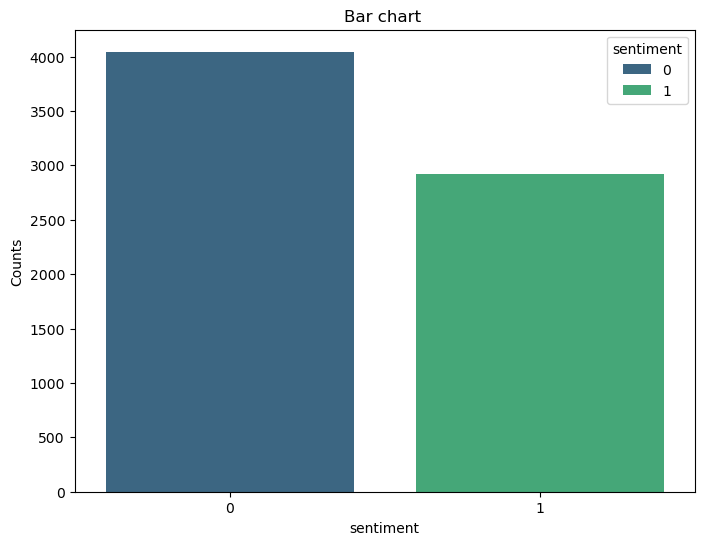

In [15]:
# Chuyển cột sentiment thành kiểu chuỗi
df1['sentiment'] = df1['sentiment'].astype(str)
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(8, 6))
# Vẽ biểu đồ cột với dodge=False để căn chỉnh cột đều nhau
sns.countplot(x='sentiment', data=df1, hue='sentiment', dodge=False, palette='viridis', width=0.8)
# Thêm tiêu đề và nhãn cho trục
plt.title('Bar chart ')
plt.xlabel('sentiment')
plt.ylabel('Counts')
# Hiển thị biểu đồ
plt.show()

In [16]:
df1['ReviewLength'] = df1['content'].apply(lambda x: len(x))  # Dùng 'Review' làm tên cột văn bản
df1 = df1[df1['ReviewLength'] != 0]
df1

,content,sentiment,ReviewLength
0,nam chính có đóng phim quỹ trung mỹ nhân đó đa...,0,92
1,phim tựa tựa như phim hãy nhắm mắt khi anh đến,1,46
2,trời ơiđã đợi dài cổ rồi lại còn cho 2 cái tra...,0,91
5,trời ơi tôi là vip và yg stans lâu lâu lục lại...,1,248
7,mình thấy phim hay mà sao mọi người cmt toàn p...,1,62
...,...,...,...
9994,cho mk hỏi xíu fdi mấy vị đại hiệp vậy dau này...,1,65
9995,phim càng ngày càng tôi laolâm đông chẳng tiến...,0,173
9997,xem rm bây giờ cũng vì sc và 6 tivi còn lại gi...,0,211
9998,đag trong chờ không biết khi nào tần vương mới...,0,65


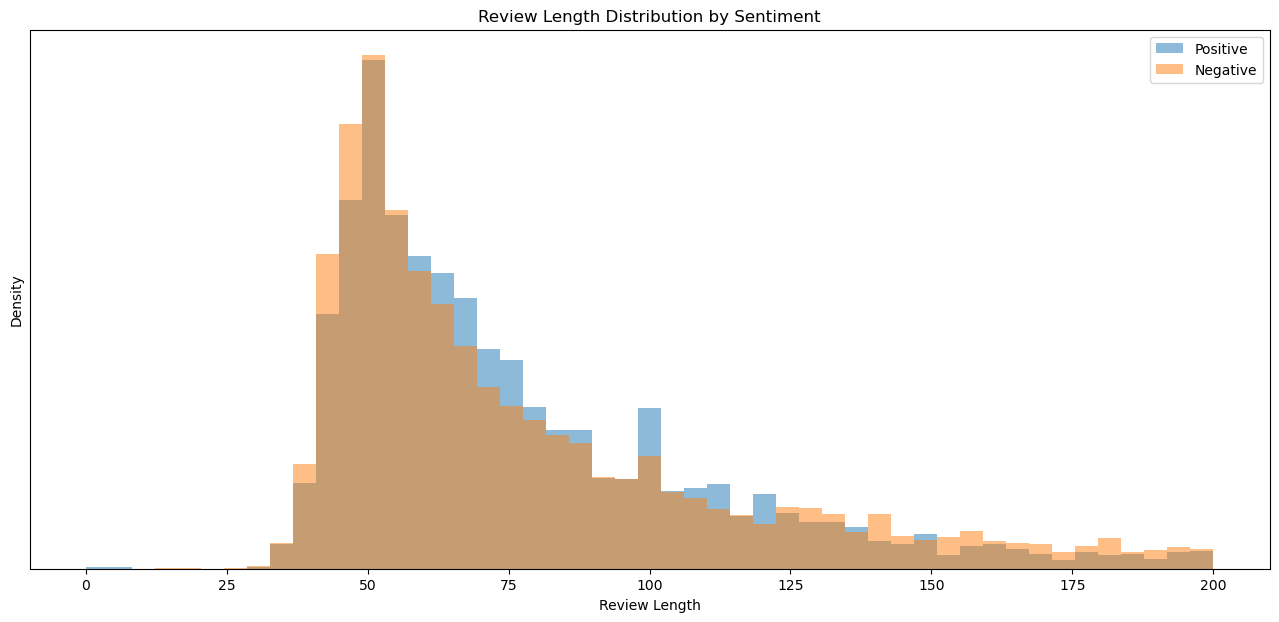

In [17]:
df1 = df1.dropna(subset=['ReviewLength', 'sentiment'])
# Lọc các giá trị sentiment 0 và 1
positive_reviews = df1[df1['sentiment'] == '1']
negative_reviews = df1[df1['sentiment'] == '0']
# Vẽ biểu đồ phân phối độ dài đánh giá
plt.figure(figsize=(16, 7))
# Đặt bins cho độ dài review (0 đến 250, chia thành 50 bins)
bins = np.linspace(0, 200, 50)
# Vẽ histogram cho Positive và Negative
plt.hist(positive_reviews['ReviewLength'], bins=bins, density=True, alpha=0.5, label='Positive')
plt.hist(negative_reviews['ReviewLength'], bins=bins, density=True, alpha=0.5, label='Negative')
# Thêm nhãn và tiêu đề
plt.xlabel('Review Length')
plt.ylabel('Density')
plt.title('Review Length Distribution by Sentiment')
plt.legend()
# Ẩn các giá trị trên trục y
plt.yticks([])
# Hiển thị biểu đồ
plt.show()


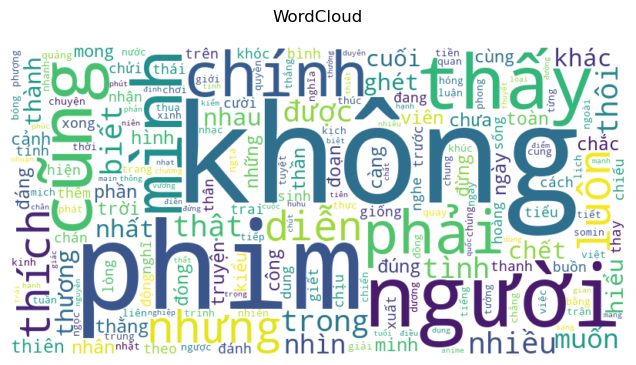

In [18]:
count_words = df1["content"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
count_words = pd.Series(" ".join(count_words).split()).value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies=count_words)
fig, ax = plt.subplots(figsize=(14, 4))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title("WordCloud\n")
plt.show()

## Xử lý mất cân bằng dữ liệu

In [19]:
from imblearn.under_sampling import RandomUnderSampler

# Chọn cột sentiment để cân bằng
X = df1.drop(columns=['sentiment'])  # Dữ liệu các cột khác ngoài 'sentiment'
y = df1['sentiment']  # Nhãn cột sentiment

# Sử dụng RandomUnderSampler để cân bằng lớp 0 và 1
rus = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = rus.fit_resample(X, y)

# Chuyển dữ liệu trở lại dataframe nếu cần
balanced_data = pd.concat([pd.DataFrame(X_balanced), pd.DataFrame(y_balanced, columns=['sentiment'])], axis=1)

# Kiểm tra kết quả cân bằng
print(balanced_data['sentiment'].value_counts())


sentiment
0    2920
1    2920
Name: count, dtype: int64


In [20]:
df=balanced_data[['content','sentiment']]
df

,content,sentiment
8993,thường thường thích nam phụ mà phim này nam ph...,0
380,mọi ng ghét nam chính lm gì nếu ghét pải ghét ...,0
5055,tại sao hnay lại ra 3 tập câu trả lời là tại l...,0
6207,vậy có mẹ tập 11 rồi mà vẫn trailer là sao,0
7960,ai pjt bài hát ở tập 273 kcái bài mà phát haha...,0
...,...,...
9987,mọi người xem trailer 1 và 2 đi hoá ra là 2 tậ...,1
9989,dàn chính diễn đâu ra đó mà chê thì bó tay rồi...,1
9992,cam giac may con be hat het hoi ay nhi toi ghe,1
9994,cho mk hỏi xíu fdi mấy vị đại hiệp vậy dau này...,1


## Chuyển đổi sang vector bằng PhoBERT

In [21]:
# Tải tokenizer và mô hình PhoBERT
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
phobert = AutoModel.from_pretrained("vinai/phobert-base")

# Hàm chuyển câu thành vector bằng PhoBERT
def sentence_to_vector_phobert(sentence):
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True, max_length=256)
    outputs = phobert(**inputs)
    # Lấy vector embedding từ tầng đầu ra (CLS token)
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().detach().numpy()
    return cls_embedding

# Áp dụng lên DataFrame
df['vector'] = df['content'].apply(sentence_to_vector_phobert)


In [22]:
df

,content,sentiment,vector
8993,thường thường thích nam phụ mà phim này nam ph...,0,"[-0.31593677, 0.7798166, 0.24729785, -0.805811..."
380,mọi ng ghét nam chính lm gì nếu ghét pải ghét ...,0,"[-0.015015801, -0.12321225, 0.20505506, -0.353..."
5055,tại sao hnay lại ra 3 tập câu trả lời là tại l...,0,"[-0.7138633, -0.36683273, -0.008913785, -0.434..."
6207,vậy có mẹ tập 11 rồi mà vẫn trailer là sao,0,"[-0.16499026, -0.34375718, 0.17417148, -0.8889..."
7960,ai pjt bài hát ở tập 273 kcái bài mà phát haha...,0,"[-0.10318685, -0.23491979, -0.6907255, -0.5896..."
...,...,...,...
9987,mọi người xem trailer 1 và 2 đi hoá ra là 2 tậ...,1,"[-0.15149719, 0.18710008, -0.18320857, -0.6506..."
9989,dàn chính diễn đâu ra đó mà chê thì bó tay rồi...,1,"[0.17211011, -0.0694029, 0.068895265, -0.52364..."
9992,cam giac may con be hat het hoi ay nhi toi ghe,1,"[-0.19247839, 0.3002664, 0.040762916, -0.83546..."
9994,cho mk hỏi xíu fdi mấy vị đại hiệp vậy dau này...,1,"[-0.40265313, 0.3520668, -0.18979548, -0.79286..."


## Huấn luyện mô hình

In [23]:
# Chuyển cột 'vector' thành numpy array
X_vectors = np.array(df['vector'].tolist())
y = np.array(df['sentiment'], dtype=np.int32)
# Chia tập dữ liệu cho huấn luyện, kiểm tra và xác thực
X_train, X_test, y_train, y_test = train_test_split(
    X_vectors, y, stratify=y, test_size=0.3, random_state=42, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.2, random_state=42, shuffle=True)
# Chuyển đổi nhãn sang kiểu numpy array
y_train = np.array(y_train, dtype=np.int32)
y_val = np.array(y_val, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

## Navie bayes

In [24]:
# Khởi tạo mô hình Gaussian Naive Bayes
nb_model = GaussianNB()
# Huấn luyện mô hình
nb_model.fit(X_train, y_train)

GaussianNB()

In [26]:
# Dự đoán trên tập kiểm tra
y_pred_nb = nb_model.predict(X_test)
# Đánh giá mô hình
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       876
           1       0.74      0.73      0.74       876

    accuracy                           0.74      1752
   macro avg       0.74      0.74      0.74      1752
weighted avg       0.74      0.74      0.74      1752



## SVM

In [27]:
# Khởi tạo mô hình SVM
svm_model = SVC(kernel='linear', random_state=42, probability=True)
# Huấn luyện mô hình
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [29]:
# Dự đoán trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78       876
           1       0.78      0.75      0.77       876

    accuracy                           0.77      1752
   macro avg       0.77      0.77      0.77      1752
weighted avg       0.77      0.77      0.77      1752



## Logistic Regression

In [30]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred_lr = logistic_regression.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79       876
           1       0.79      0.76      0.78       876

    accuracy                           0.78      1752
   macro avg       0.78      0.78      0.78      1752
weighted avg       0.78      0.78      0.78      1752



## LSTM

In [33]:
# Đảm bảo X_train, X_val, X_test có định dạng 3D (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [34]:
# Xây dựng mô hình LSTM
model = Sequential()

# LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.3))

# Dense layer (lớp cuối cùng)
model.add(Dense(1, activation='sigmoid'))  # Dùng sigmoid cho bài toán nhị phân

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# In kiến trúc mô hình
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │       459,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 459,393 (1.75 MB)

 Trainable params: 459,393 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,           # Sử dụng nhãn ban đầu (không one-hot)
    validation_data=(X_val, y_val),
    epochs=20,                  # Số lượng epochs
    batch_size=32,              # Kích thước batch
    verbose=1
)


Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6539 - loss: 0.6059 - val_accuracy: 0.7579 - val_loss: 0.4976
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7886 - loss: 0.4424 - val_accuracy: 0.7592 - val_loss: 0.5040
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8185 - loss: 0.4016 - val_accuracy: 0.7604 - val_loss: 0.4850
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8194 - loss: 0.3961 - val_accuracy: 0.7628 - val_loss: 0.5043
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8343 - loss: 0.3539 - val_accuracy: 0.7775 - val_loss: 0.4769
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8652 - loss: 0.3250 - val_accuracy: 0.7616 - val_loss: 0.4836
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8646 - loss: 0.3188 - val_accuracy: 0.7775 - val_loss: 0.4995
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8610 - loss: 0.3069 - val_accuracy: 0.

In [37]:
# Dự đoán nhãn cho tập kiểm tra
y_pred_lstm =model.predict(X_test)
y_pred_lstm_binary = (y_pred_lstm >= 0.5).astype(int)
# In báo cáo phân loại
from sklearn.metrics import classification_report
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm_binary))


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       876
           1       0.79      0.79      0.79       876

    accuracy                           0.79      1752
   macro avg       0.79      0.79      0.79      1752
weighted avg       0.79      0.79      0.79      1752



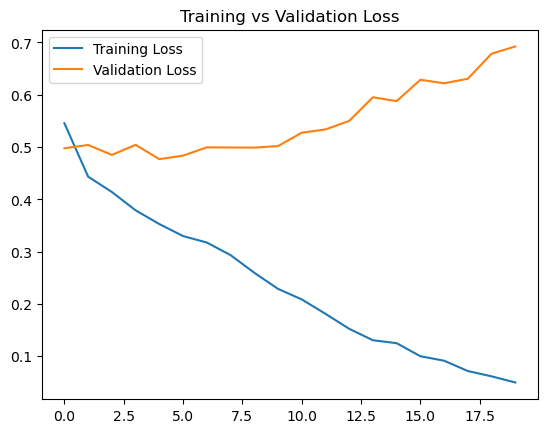

In [38]:
import matplotlib.pyplot as plt
# Vẽ đồ thị loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


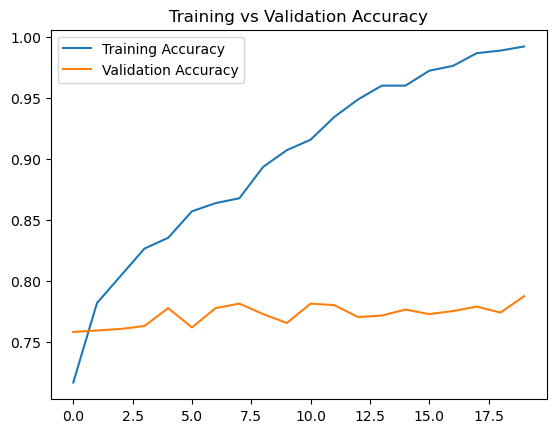

In [39]:
# Vẽ đồ thị accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


### Đánh giá

In [40]:
evaluation_nb = precision_recall_fscore_support(y_test, y_pred_nb, average='weighted')

evaluation_svm = precision_recall_fscore_support(y_test, y_pred_svm, average='weighted')

evaluation_lr = precision_recall_fscore_support(y_test, y_pred_lr, average='weighted')

y_pred_lstm = (y_pred_lstm > 0.5).astype(int)
evaluation_lstm = precision_recall_fscore_support(y_test, y_pred_lstm, average='weighted')

# Tạo bảng đánh giá
data = {
    'Model': ['Naive Bayes', 'SVM', 'Logistic Regression', 'LSTM'],
    'Precision': [evaluation_nb[0], evaluation_svm[0], evaluation_lr[0], evaluation_lstm[0]],
    'Recall': [evaluation_nb[1], evaluation_svm[1], evaluation_lr[1], evaluation_lstm[1]],
    'F1 Score': [evaluation_nb[2], evaluation_svm[2], evaluation_lr[2], evaluation_lstm[2]],
    'Support': [evaluation_nb[3], evaluation_svm[3], evaluation_lr[3], evaluation_lstm[3]]
}

df = pd.DataFrame(data)
print(df)

                 Model  Precision    Recall  F1 Score Support
0          Naive Bayes   0.736306  0.736301  0.736300    None
1        Decision Tree   0.772801  0.772260  0.772147    None
2  Logistic Regression   0.783039  0.782534  0.782437    None
3                 LSTM   0.789393  0.789384  0.789382    None


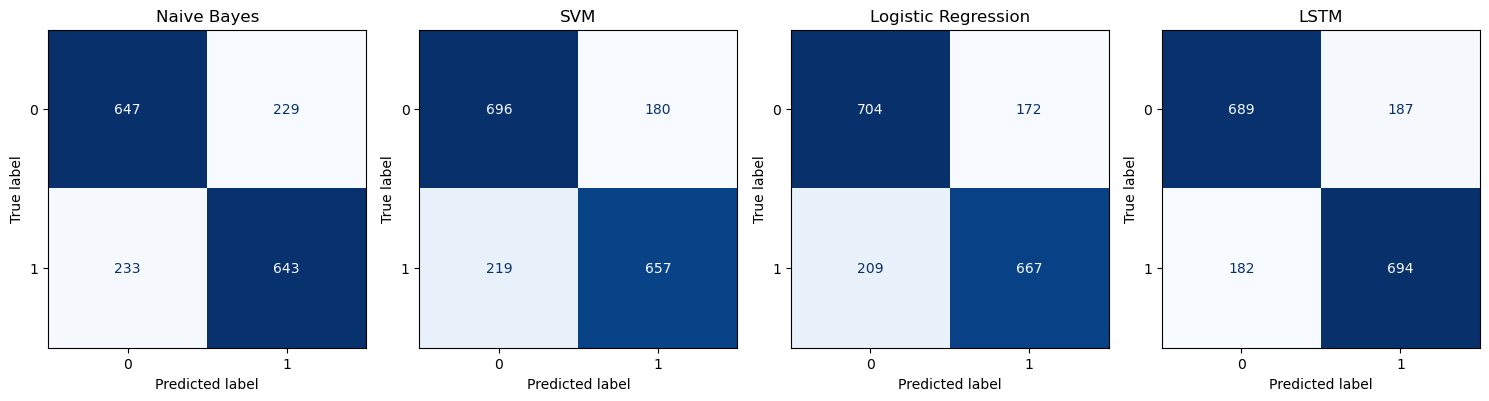

In [41]:
# Danh sách tên mô hình
model_names = ['Naive Bayes', 'SVM', 'Logistic Regression', 'LSTM']
# Danh sách mô hình đã huấn luyện
models = [nb_model, svm_model, logistic_regression, model]  # 'lstm_model' là mô hình LSTM
# Danh sách dự đoán của các mô hình
y_preds = [y_pred_nb, y_pred_svm, y_pred_lr, y_pred_lstm]  # Các dự đoán tương ứng cho mỗi mô hình
# Hàm vẽ ma trận nhầm lẫn cho từng mô hình
def plot_confusion_matrices(model_names, y_preds, y_true):
    fig, axes = plt.subplots(1, len(model_names), figsize=(15, 5))
    
    for i, (name, y_pred) in enumerate(zip(model_names, y_preds)):
        # Tạo ma trận nhầm lẫn
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
        
        # Vẽ ma trận nhầm lẫn
        disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
        axes[i].set_title(name)
    
    plt.tight_layout()
    plt.show()
# Gọi hàm vẽ
plot_confusion_matrices(model_names, y_preds, y_test)